## **Loading and Preprocessing the Dataset**

In [27]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import seaborn as sns


In [28]:
data=pd.read_csv('/content/Historical Product Demand.csv')
data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100.0
1,Product_0979,Whse_J,Category_028,2012/1/19,500.0
2,Product_0979,Whse_J,Category_028,2012/2/3,500.0
3,Product_0979,Whse_J,Category_028,2012/2/9,500.0
4,Product_0979,Whse_J,Category_028,2012/3/2,500.0


# **Data Exploring and Cleaning**

In [29]:

#Check the cardinality.
df.shape



(21128, 5)

In [30]:
#Check the data types.
df.dtypes

Product_Code         object
Warehouse            object
Product_Category     object
Date                 object
Order_Demand        float64
dtype: object

In [31]:
data.describe()

,Order_Demand
count,2.112700e+04
mean,1.453929e+04
std,6.273185e+04
min,1.000000e+00
25%,2.000000e+02
50%,2.000000e+03
75%,1.000000e+04
max,4.000000e+06


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21128 entries, 0 to 21127
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Code      21128 non-null  object 
 1   Warehouse         21128 non-null  object 
 2   Product_Category  21128 non-null  object 
 3   Date              21127 non-null  object 
 4   Order_Demand      21127 non-null  float64
dtypes: float64(1), object(4)
memory usage: 825.4+ KB


# **Data Cleaning**

In [33]:
data.isnull().sum
#convert date column to date time
data['Date']=pd.to_datetime(data['Date'],errors='coerce')
data.Date.sort_values().unique()[:10]
data.index=pd.to_datetime(data.index)
data

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1970-01-01 00:00:00.000000000,Product_0993,Whse_J,Category_028,2012-07-27,100.0
1970-01-01 00:00:00.000000001,Product_0979,Whse_J,Category_028,2012-01-19,500.0
1970-01-01 00:00:00.000000002,Product_0979,Whse_J,Category_028,2012-02-03,500.0
1970-01-01 00:00:00.000000003,Product_0979,Whse_J,Category_028,2012-02-09,500.0
1970-01-01 00:00:00.000000004,Product_0979,Whse_J,Category_028,2012-03-02,500.0
...,...,...,...,...,...
1970-01-01 00:00:00.000021123,Product_1381,Whse_J,Category_019,2012-06-21,100.0
1970-01-01 00:00:00.000021124,Product_1294,Whse_J,Category_019,2012-06-27,500.0
1970-01-01 00:00:00.000021125,Product_1381,Whse_J,Category_019,2012-06-29,1000.0
1970-01-01 00:00:00.000021126,Product_1452,Whse_J,Category_019,2012-06-29,1000.0


# **Data Visualization**

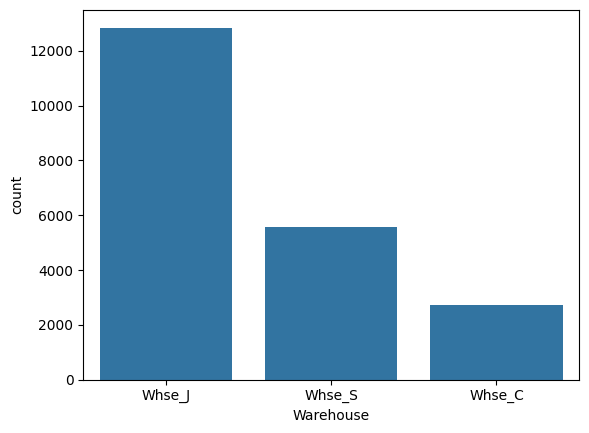

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' and a column named 'Warehouse'
sns.countplot(x='Warehouse', data=data)
plt.show()


In [35]:
import pandas as pd

# Sample data
data = pd.DataFrame({
    'Warehouse': ['A', 'B', 'A', 'C', 'B', 'A'],
    'Order_Demand': [100, 200, 150, 300, 100, 250]
})

# Grouping by 'Warehouse' and summing the 'Order_Demand' for each group
Warehouse_Demand = data.groupby('Warehouse')['Order_Demand'].sum()

# Display the result
print(Warehouse_Demand)


Warehouse
A    500
B    300
C    300
Name: Order_Demand, dtype: int64


# **Linear Programing Model**

In [36]:
# Average demand
demand=data['Order_Demand'].mean()
demand

183.33333333333334

In [40]:
import pandas as pd

# Example DataFrame
data = pd.DataFrame({
    'Warehouse': ['A', 'B', 'C'],
    'Initial_Inventory': [500, 600, 700]  # Replace with your actual values
})

# Calculate the maximum inventory for each warehouse
data['Max_Inventory'] = data['Initial_Inventory'] * 2

# Display the result
print(data)


  Warehouse  Initial_Inventory  Max_Inventory
0         A                500           1000
1         B                600           1200
2         C                700           1400


In [42]:
#example holding cost per unit days
holding_cost=2
#example ordering cost per ordeer
ordering_cost=50
# number of days to hold inventory
holding_days=30
# total no of cost function
c=[holding_cost*holding_days+ordering_cost]
c

[110]

# **Solving Optimization Problem**

In [53]:
from scipy.optimize import linprog

# Define the coefficients of the linear objective function to be minimized
c = [1]  # Example coefficient, replace with your actual coefficients

# Define the demand and initial inventory
demand = 100  # Replace with your actual value
initial_inventory = 500  # Replace with your actual value

# Calculate the maximum inventory
max_inventory = initial_inventory * 2

# Define the inequality matrix A and vector B
A = [[-1], [1]]  # This ensures that the order quantity x is at least equal to the average demand
B = [-demand, max_inventory - initial_inventory]  # This ensures that the order quantity x does not exceed the available capacity to reach the maximum inventory

# Define the bounds for the decision variables
bounds = [(0, None)]  # This specifies that the order quantity x can't be negative

# Solve the linear programming problem
x = linprog(c, A_ub=A, b_ub=B, bounds=bounds, method='highs')

# Display the result
x


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 100.0
              x: [ 1.000e+02]
            nit: 0
          lower:  residual: [ 1.000e+02]
                 marginals: [ 0.000e+00]
          upper:  residual: [       inf]
                 marginals: [ 0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  4.000e+02]
                 marginals: [-1.000e+00 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [55]:
#optimal Order Quantity
optimal_order_quantity=x.x[0]
total_cost=x.fun
optimal_order_quantity

100.0

# **Sensitivity Analysis**

In [57]:
# 20% increase in demand
demand_change=1.2
#20% decrease in demand
holding_cost_change=0.8
#50% increase in lead time
lead_time_change=1.5

In [60]:
new_demand=demand*demand_change
new_holding_cost=holding_cost*holding_cost_change
new_lead_time=holding_days*holding_cost_change


In [61]:
new_demand

120.0

In [62]:
new_holding_cost

1.6

In [63]:
new_lead_time

24.0

In [66]:
from scipy.optimize import linprog

def sensitivity_analysis(demand_change, holding_cost_change, lead_time_change, demand, holding_cost, holding_days, ordering_cost, max_inventory, initial_inventory):
    # Calculate new values based on changes
    new_demand = demand + demand_change
    new_holding_cost = holding_cost + holding_cost_change
    new_lead_time = holding_days + lead_time_change

    # Define the new objective function coefficients
    new_c = [new_holding_cost + ordering_cost]

    # Define the new inequality constraints matrix A and vector B
    new_b = [-new_demand, max_inventory - initial_inventory]

    # Define the bounds for the decision variables
    bounds = [(0, None)]  # This specifies that the order quantity x can't be negative

    # Solve the linear programming problem with the new parameters
    new_x = linprog(new_c, A_ub=A, b_ub=new_b, bounds=bounds, method='highs')

    # Retrieve the new optimal order quantity and total cost
    new_optimal_order_quantity = new_x.x[0]
    new_total_cost = new_x.fun

    # Print and return the results
    print("New optimal order quantity:", new_optimal_order_quantity)
    print("New total cost:", new_total_cost)

    return new_optimal_order_quantity, new_total_cost

# Example usage:
# Assuming A, demand, holding_cost, holding_days, ordering_cost, max_inventory, initial_inventory are defined elsewhere
# You need to define them based on your specific problem setup

# sensitivity_analysis(demand_change, holding_cost_change, lead_time_change, demand, holding_cost, holding_days, ordering_cost, max_inventory, initial_inventory)


In [69]:
# Example values for parameters
demand_change = 20  # Example change in demand
holding_cost_change = 5  # Example change in holding cost
lead_time_change = -2  # Example change in lead time

demand = 100  # Example current demand
holding_cost = 10  # Example current holding cost
holding_days = 30  # Example current holding days
ordering_cost = 2  # Example current ordering cost
max_inventory = 1000  # Example maximum inventory
initial_inventory = 500  # Example initial inventory

# Call sensitivity_analysis function with all required arguments
optimal_order_quantity_sensitivity, total_cost_sensitivity = sensitivity_analysis(
    demand_change, holding_cost_change, lead_time_change,
    demand, holding_cost, holding_days, ordering_cost, max_inventory, initial_inventory)

# Print or use the returned values as needed
print("Optimal order quantity sensitivity:", optimal_order_quantity_sensitivity)
print("Total cost sensitivity:", total_cost_sensitivity)


New optimal order quantity: 120.0
New total cost: 2040.0
Optimal order quantity sensitivity: 120.0
Total cost sensitivity: 2040.0


In [71]:
print('sensitivity Analysis:')
print("optimal order (sensitivity):",optimal_order_quantity_sensitivity)
print('total cost sensitivity:',total_cost_sensitivity)

sensitivity Analysis:
optimal order (sensitivity): 120.0
total cost sensitivity: 2040.0


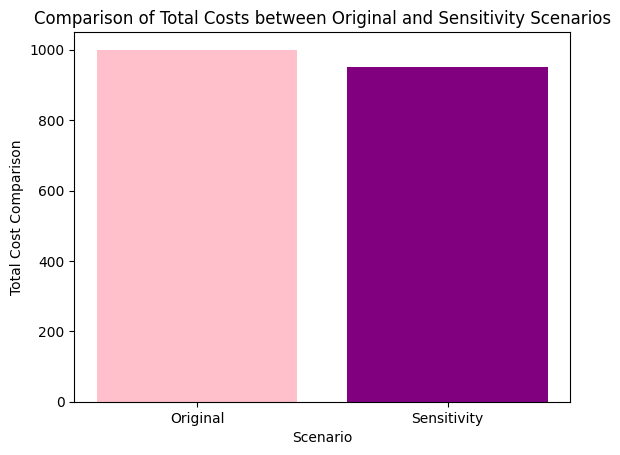

In [77]:
import matplotlib.pyplot as plt

# Example data (replace with your actual values)
total_cost_original = 1000  # Replace with your actual total cost for the original scenario
total_cost_sensitivity = 950  # Replace with your actual total cost for the sensitivity scenario

labels = ['Original', 'Sensitivity']
total_cost = [total_cost_original, total_cost_sensitivity]

# Plotting the bar chart
plt.bar(labels, total_cost, color=['pink', 'purple'])
plt.xlabel('Scenario')
plt.ylabel('Total Cost Comparison')
plt.title('Comparison of Total Costs between Original and Sensitivity Scenarios')
plt.show()


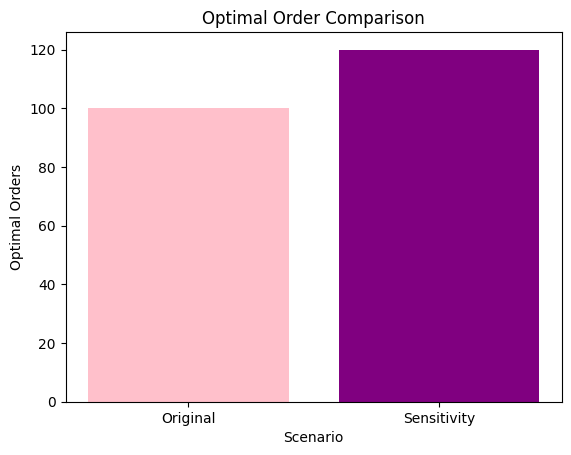

In [81]:
labels = ["Original", "Sensitivity"]
optimal_orders = [optimal_order_quantity, optimal_order_quantity_sensitivity]
plt.bar(labels, optimal_orders, color=(['pink', 'purple']))
plt. xlabel("Scenario")
plt.ylabel("Optimal Orders")
plt.title("Optimal Order Comparison")
plt.show()